In [58]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3


In [59]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/CNN Car Pred/Datasets/Train'
valid_path = '/content/drive/My Drive/CNN Car Pred/Datasets/Test'

In [60]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [61]:
for layer in vgg19.layers:
    layer.trainable = False

In [62]:
folders = glob('/content/drive/My Drive/CNN Car Pred/Datasets/Train/*')

In [63]:
folders

['/content/drive/My Drive/CNN Car Pred/Datasets/Train/mercedes',
 '/content/drive/My Drive/CNN Car Pred/Datasets/Train/lamborghini',
 '/content/drive/My Drive/CNN Car Pred/Datasets/Train/jaguar',
 '/content/drive/My Drive/CNN Car Pred/Datasets/Train/audi',
 '/content/drive/My Drive/CNN Car Pred/Datasets/Train/bmw',
 '/content/drive/My Drive/CNN Car Pred/Datasets/Train/ferrari']

In [64]:
x = Flatten()(vgg19.output)

In [65]:
prediction = Dense(len(folders), activation='softmax')(x)


In [66]:
model = Model(inputs=vgg19.input, outputs=prediction)

In [67]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [68]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [70]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/CNN Car Pred/Datasets/Train/',target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 2259 images belonging to 6 classes.


In [71]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/CNN Car Pred/Datasets/Test/',target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 281 images belonging to 6 classes.


In [72]:
v = model.fit_generator(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
 5/36 [===>..........................] - ETA: 41s - loss: 3.2942 - accuracy: 0.1719

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 59s 2s/step - loss: 1.7855 - accuracy: 0.4112 - val_loss: 1.1588 - val_accuracy: 0.5836
Epoch 2/20
36/36 [==============================] - 59s 2s/step - loss: 0.8092 - accuracy: 0.7242 - val_loss: 1.0111 - val_accuracy: 0.6441
Epoch 3/20
36/36 [==============================] - 59s 2s/step - loss: 0.6113 - accuracy: 0.7964 - val_loss: 1.1258 - val_accuracy: 0.5872
Epoch 4/20
36/36 [==============================] - 57s 2s/step - loss: 0.4877 - accuracy: 0.8508 - val_loss: 0.7726 - val_accuracy: 0.7402
Epoch 5/20
36/36 [==============================] - 56s 2s/step - loss: 0.3755 - accuracy: 0.9013 - val_loss: 0.7311 - val_accuracy: 0.7616
Epoch 6/20
36/36 [==============================] - 57s 2s/step - loss: 0.3348 - accuracy: 0.9048 - val_loss: 0.7474 - val_accuracy: 0.7153
Epoch 7/20
36/36 [==============================] - 55s 2s/step - loss: 0.2852 - accuracy: 0.9274 - val_loss: 0.6757 - val_accuracy: 0.7651
Epoch 8/20
36/36 [=============

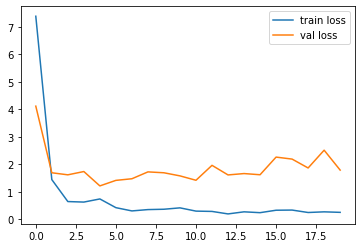

In [73]:
plt.plot(i.history['loss'],label = 'train loss')
plt.plot(i.history['val_loss'],label = 'test loss')
plt.legend()
plt.show()

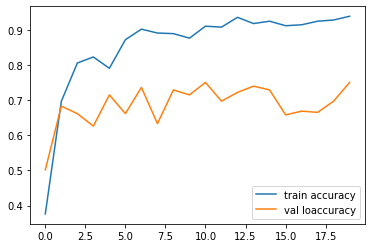

In [74]:
plt.plot(i.history['accuracy'],label = 'train accuracy')
plt.plot(i.history['val_accuracy'],label = 'test accuracy')
plt.legend()
plt.show()

In [75]:
from keras.models import load_model

In [76]:
model.save('model_vgg16_6.h5')

In [77]:
from google.colab import files
files.download('model_vgg16_6.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
y_pred = model.predict(test_set)

In [79]:
y_pred.shape

(281, 6)

In [80]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [81]:
y_pred

array([2, 2, 4, 3, 2, 5, 5, 0, 2, 1, 5, 1, 1, 0, 1, 0, 3, 3, 4, 1, 2, 3,
       1, 4, 2, 0, 5, 0, 1, 0, 1, 3, 2, 2, 1, 0, 4, 1, 1, 2, 4, 1, 1, 3,
       0, 4, 1, 4, 0, 4, 4, 2, 0, 1, 4, 1, 1, 1, 5, 1, 4, 1, 5, 4, 5, 0,
       2, 0, 1, 1, 0, 1, 5, 0, 2, 4, 3, 0, 4, 1, 3, 0, 0, 4, 1, 0, 1, 1,
       0, 1, 1, 1, 3, 1, 2, 2, 2, 4, 4, 4, 1, 4, 1, 1, 1, 1, 2, 4, 0, 1,
       0, 1, 5, 2, 0, 5, 5, 0, 3, 0, 4, 2, 0, 1, 0, 1, 5, 2, 5, 3, 0, 4,
       1, 5, 3, 1, 0, 2, 1, 1, 4, 0, 5, 3, 4, 1, 1, 4, 2, 5, 4, 1, 4, 4,
       3, 0, 3, 0, 5, 2, 3, 5, 2, 4, 4, 0, 4, 1, 4, 2, 0, 3, 0, 4, 5, 5,
       4, 2, 2, 4, 1, 2, 1, 1, 4, 4, 4, 4, 1, 4, 0, 4, 2, 1, 4, 4, 3, 1,
       3, 0, 3, 0, 1, 0, 4, 2, 4, 2, 2, 2, 1, 1, 4, 2, 1, 2, 0, 3, 3, 4,
       0, 1, 2, 3, 3, 1, 1, 4, 4, 4, 1, 2, 2, 1, 4, 3, 1, 4, 2, 3, 0, 3,
       1, 4, 0, 5, 0, 3, 4, 3, 3, 2, 1, 2, 1, 4, 4, 1, 1, 4, 2, 4, 5, 4,
       5, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 0])

In [109]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/CNN Car Pred/model_vgg19_6.h5')

In [114]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/My Drive/CNN Car Pred/download.jpg',target_size=(224,224))

In [115]:
image = image.img_to_array(img)
image = image/255.  
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
model.predict(image)
import numpy as np
a=np.argmax(model.predict(image), axis=1)
if a==0:
  print ("That's an Audi!")
elif a==1:
  print("That's a BMW!")
elif a==2:
  print("That's a Ferrari!")
elif a==3:
  print("That's a Jaguar!")
elif a==4:
  print("That's a Lamborghini!")
elif a==5:
  print("That's a Mercedes!")
else :
  print('No car found')

That's a Mercedes!
